# I. Linear least squares approximation

Consider a function $y = f(x)$ which is defined by a set of values $y_0, y_1, \cdots, y_n$ at points $x_0, x_1, \cdots, x_n$.

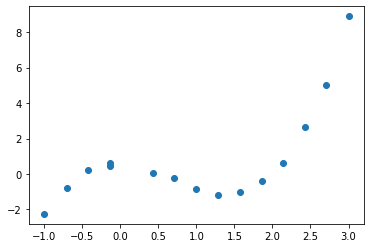

In [1]:
import matplotlib.pyplot as plt
import numpy as np
x = np.array([-1, -0.7, -0.43, -0.14, -0.14, 0.43, 0.71, 1, 1.29, 1.57, 1.86, 2.14, 2.43, 2.71, 3])
y = np.array([-2.25, -0.77, 0.21, 0.44, 0.64, 0.03, -0.22, -0.84, -1.2, -1.03, -0.37, 0.61, 2.67, 5.04, 8.90])
plt.plot(x, y, 'o')

### I.I. Find a best fit polynomial

$$
P_m(x) = a_0 + a_1 x + \cdots + a_m x^m
$$

using the linear least squares approach. To this end

1. implement a function which constructs the design matrix using $1, x, \cdots, x^m$ as the basis functions.

2. construct explicitly the normal system of equations of the linear least squares problem at fixed $m$.

3. Solve the normal equations to find the coefficients of $P_m(x)$ for $m = 0, 1, 2, \dots$. For the linear algebra problem, you can either use library functions (`numpy.linalg.solve`) or your LU factorization code from week 1.

(20% of the total grade)

In [2]:
def A(x, m=1):
    return np.array([[x[j]**i for i in range(m)] for j in range (len(x))])


def solve(x, y, m):
    return np.linalg.solve(A(x, m).T@A(x, m), A(x, m).T@y)


def P(x, beta):
    x = np.asarray(x)
    return sum([(beta[i] * (x ** i)) for i in range(len(beta))])

### I.II 

To find the optimal value of m, use the following criterion: take $m=0, 1, 2, \dots$, for each value of $m$ compute 

$$
\sigma_m^2 = \frac{1}{n - m} \sum_{k=0}^n \left( P_m(x_k) - y_k \right)^2
$$

And take the value of $m$, at which $\sigma_m$ stabilizes or starts increasing.

(20% of the total grade)

[8.12053333e+00 8.03076381e+00 4.79254016e+00 2.65787925e+00
 1.36046172e-02 1.37064483e-02 1.40000659e-02 1.30396654e-02
 1.40446192e-02 1.34976001e-02 1.55172542e-02 1.78223995e-02
 7.17254361e-03 1.06935760e-02 2.00972168e-02]
2.6578792473774424


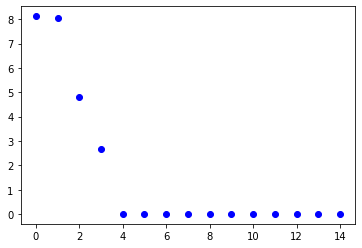

In [77]:
def sigma(x, y, m):
    n = len(x)
    return (1/(n-m))*sum((P(x, solve(x, y, m)) - y)**2)


n = len(x)
err = np.zeros(n)
for m in range(n):
    err[m] = sigma(x, y, m)
#     print(sigma(x, y, m))
    plt.plot(m, sigma(x, y, m), 'o', color='b')
print(err)
m_min = np.argmin(err)
print(err[3])

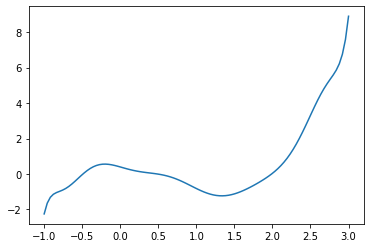

In [78]:
beta = solve(x, y, m_min)
x1 = np.linspace(-1, 3, 100)
plt.plot(x1, P(x1, beta))


Видно, что система переобучена. Возьмем значение m, до первого возрастания ошибки. 

0.013604617199707287 4


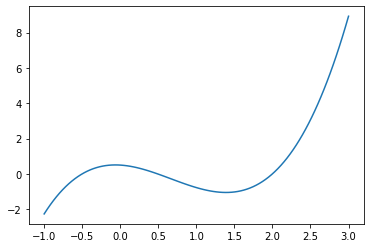

In [79]:
k=0
while True:
    k+=1
    if err[k] < err[k+1]:
        print(err[k], k)
        m_opt = k
        plt.plot(x1, P(x1, solve(x, y, k)))
        break

Уже похоже на правду

Plot your polynomials $P_m(x)$ on one plot, together with the datapoints. Visually compare best-fit polynomials of different degrees. Is the visual comparison consistent with the optimal value of $m$?

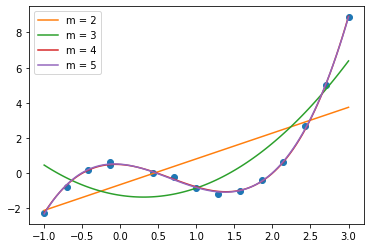

In [80]:
plt.plot(x, y, 'o')
for m in range(2, k+2):
    plt.plot(x1, P(x1, solve(x, y, m)), label = "m = {}".format(m))
plt.legend()

### I.III. Linear least-squares using the QR factorization.

For the optimal value of $m$ from the previous part, solve the LLS problem using the QR factorization, withou ever forming the normal equations explicitly. For linear algebra, you can use standard library functions (look up `numpy.linalg.solve`, `numpy.linalg.qr` etc) or your code from previous weeks.

Compare the results with the results of solving the normal system of equations.

(20% of the grade)

In [91]:
q, r = np.linalg.qr(A(x, m_opt))
beta_qr = np.linalg.solve(r, q.T @ y)
print (np.round((beta_qr - solve(x, y, m_opt))**2, 16))

[0. 0. 0. 0.]


Абсолютно такое же решение

# II. Lagrange interpolation

### II.1 

Consider the function, $f(x) = x^2 \cos{x}$. On the interval $x\in [\pi/2, \pi]$, interpolate the function using the Lagrange interpolating polynomial of degree $m$ with $m=1, 2, 3, 4, 5$. Use the uniform mesh. Plot the resulting interpolants together with $f(x)$.

(20% of the total grade)

In [57]:
def f(x):
    return (x**2)*np.cos(x)


def lagrange_k(xval, xk, k):
    n = len(xk)
    num, den = 1.0, 1.0 
    for j in range(n):
        if j == k: 
            continue
        den *= (xk[k] - xk[j])
        num *= (xval - xk[j])
    return num / den


def lagrange(xval, xk, yk):
    return sum(yk[k] * lagrange_k(xval, xk, k) for k in range(len(xk)))
a = np.pi/2
b = np.pi


def plot_interp(xx, f):
    xn = np.linspace(a, b, 100)
    yn = [lagrange(_, xx, f(xx)) for _ in xn]
    
    plt.plot(xn, yn, '-', label=r'interp, $n= %s$' % len(xx))
    plt.plot(xx, f(xx), 'o', ms=7)
    plt.legend(loc='best')

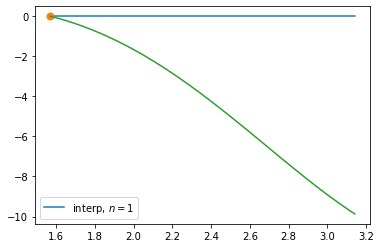

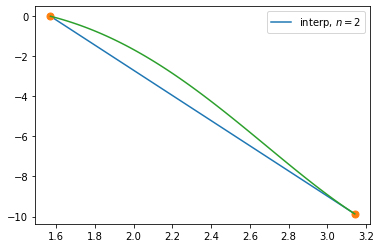

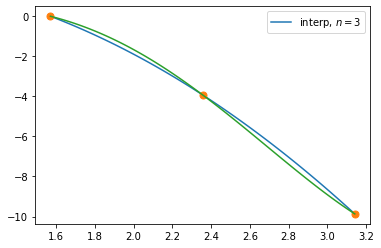

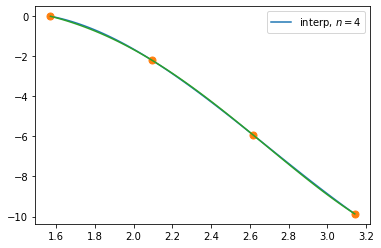

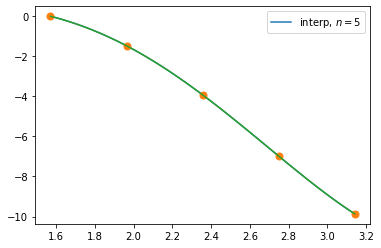

In [58]:
x2 = np.linspace(a, b, 100)
for k in range(1,6):
    plot_interp(np.linspace(a, b, k), f)
    plt.plot(x2, f(x2))
    plt.show()

### II.2. 

Repeat the previous task using the Chebyshev nodes. Compare the quality of interpolation on a uniform mesh and Chebyshev nodes for $m=3$.

(20% of the total grade)

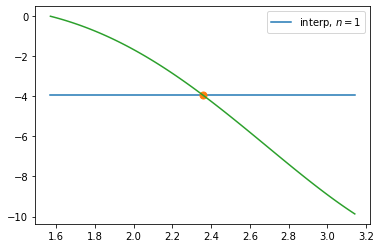

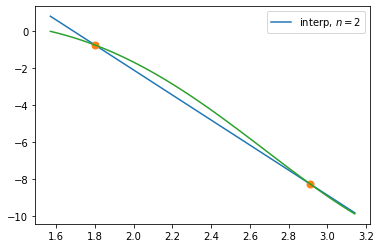

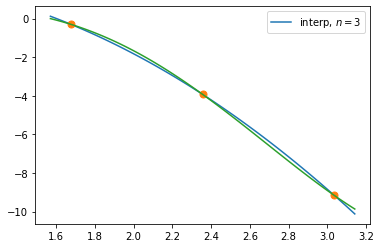

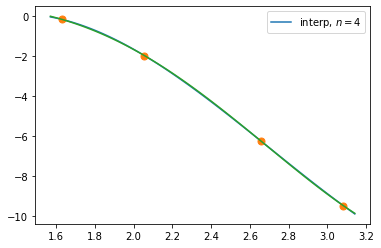

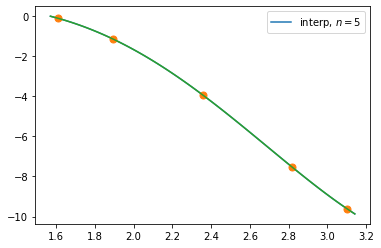

In [63]:
def x_cheb(k):
    return (a+b)/2 + (b-a)*np.cos((2*np.arange(1,k+1)-1)/2/k*np.pi)/2


for k in range(1,6):
    plot_interp(x_cheb(k), f)
    plt.plot(x2, f(x2))
    plt.show()

In [68]:
def error(x, f):
    y = [lagrange(_, x, f(x)) for _ in x2]
    return sum((y - f(x2))**2)


for k in range(1, 6):
    err_unif = error(np.linspace(a, b, k), f)
    err_cheb = error(x_cheb(k), f)
    print(err_unif, err_cheb)
    print(err_unif/err_cheb, '\n')

2793.773855679304 955.6660161409676
2.923378888119008 

54.23471285206171 15.450529715019009
3.510217050962449 

4.535725814682679 1.8655904859342038
2.431254795133344 

0.1048193897984238 0.0558584538406361
1.8765179232757323 

0.00012138755359027457 6.054341164148917e-05
2.0049671846885175 



То есть, точность интерполяции через разбиение Чебышева в несколько раз превосходит однородное